# CS148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
#import warnings
#warnings.filterwarnings('ignore') 
random.seed(42) 

In [2]:
def report_classifier_performance(clf,train_data_tf, test_data_tf,train_label,test_label):
    print(clf)
    clf.fit(train_data_tf,train_label)
    prediction = clf.predict(test_data_tf)
    accuracy_tf = metrics.accuracy_score(test_label,prediction)
    precision_tf = metrics.precision_score(test_label,prediction)
    recall_tf = metrics.recall_score(test_label,prediction)
    f1_tf = metrics.f1_score(test_label,prediction)

    confusion_matrix_tf = metrics.confusion_matrix(test_label, prediction)
    
    print("Accuracy with transformed data: ",accuracy_tf)
    print("Precision with transformed data: ",precision_tf)
    print("Recall with transformed data: ",recall_tf)
    print("F1 score with transformed data: ",f1_tf)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_tf,display_labels = ["Healthy","Sick"] )

    cm_display.plot()
    plt.show() 

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [3]:
heart_df = pd.read_csv("heartdisease.csv")

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


[Provide Answer here:] Sick feature is a boolean feature, therefore it requires a label encoder to transform boolean data to numeric data. Also note that, sex, cp, fbs, restecg, exang, slope, ca, thal features are only taking couple of positive integers. Therefore, they should be treated as caterogical features. Lastly, there are no missing data, so we do need to impute.

### Determine if we're dealing with any null values. If so, report on which columns? 

In [7]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

[Discuss here] There are no null values at the dataset.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [8]:
heart_df["sick"]

0      False
1      False
2      False
3      False
4      False
       ...  
298     True
299     True
300     True
301     True
302     True
Name: sick, Length: 303, dtype: bool

In [9]:
heart_df["sick"] = heart_df["sick"].astype("int")

In [10]:
heart_df["sick"]

0      0
1      0
2      0
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: sick, Length: 303, dtype: int32

### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

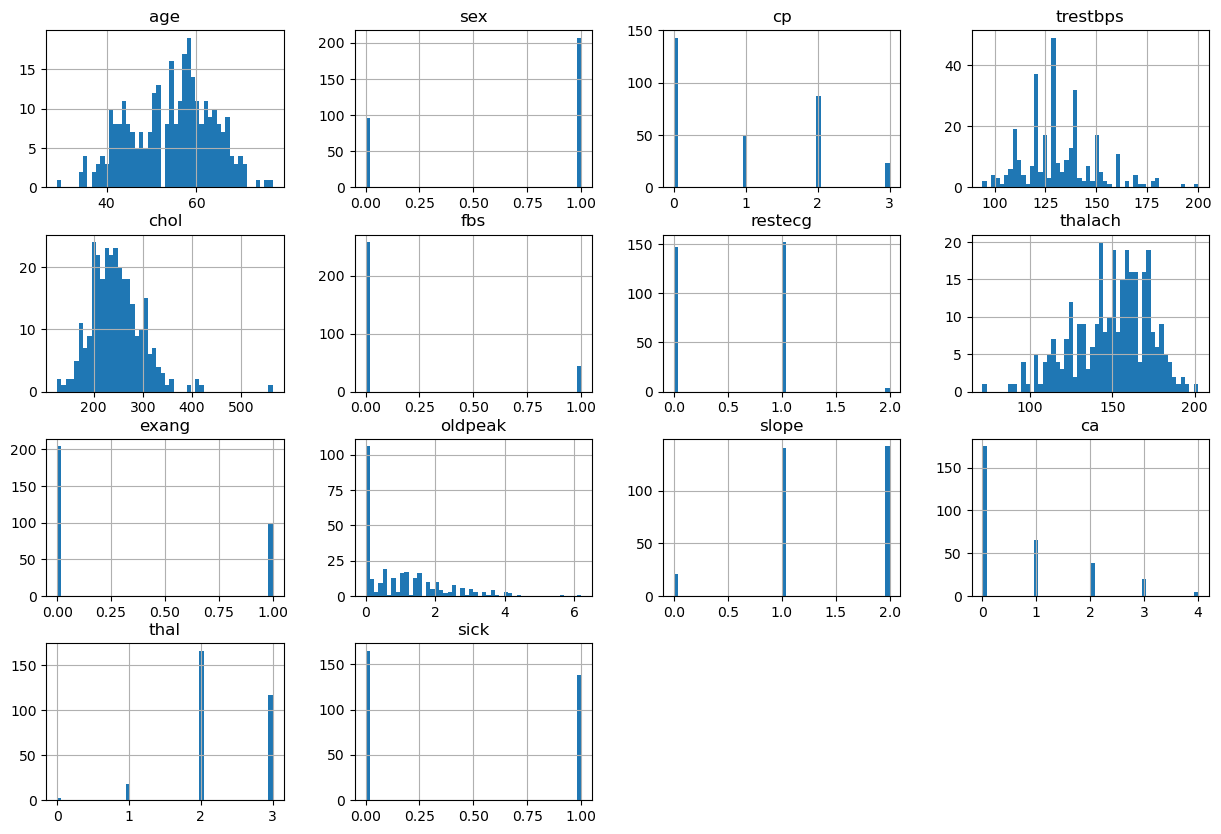

In [11]:
heart_df.hist(bins=50, figsize=(15, 10))
plt.show()

It is easy to see that age, chol and thalach follow normal distribution which also means they follow a gradient.\
It can be discussed that trestbps follow a normal distribution.\
Oldpeak follow a chi-squared distribution or geometric distribution.\
Sex, fbs, exang and sick take binary values, 0 and 1.\
Cp takes integer values between [0,3].\
Restech takes integer values between [0,2].\
Slope takes integer values between [0,2].\
Ca takes integer values between [0,4] and follows a geometric distribution.\
Thai takes integer values between [0,3].


### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

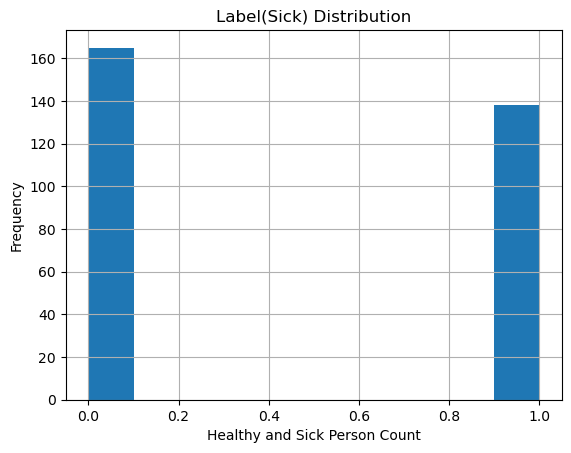

In [12]:
heart_df["sick"].hist()
plt.xlabel("Healthy and Sick Person Count")
plt.ylabel("Frequency")
plt.title("Label(Sick) Distribution")
plt.show()

In [13]:
print("Number of sick people is",sum(heart_df["sick"] == 1))
print("Number of healthy people is",sum(heart_df["sick"] == 0))

Number of sick people is 138
Number of healthy people is 165


[Include description of findings here] There are 165 healthy people and 138 sick people in the dataset. We can consider this dataset as a balanced one, so classifiers can be easily used.

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Discuss prompt here]You can lose information such as occurence frequency. Suppose you choose to sample less the category with higher number of samples. The category that has larger amount of samples will be sampled less, so classifier would not be able to learn whole category. If you do oversampling on the category that has smaller amount of samples, you may end up overfitting to the train data much easily. Also, classifier won't be able to grasp the distribution of labels. In addition to that, you introduce bias on sampling.

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [14]:
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


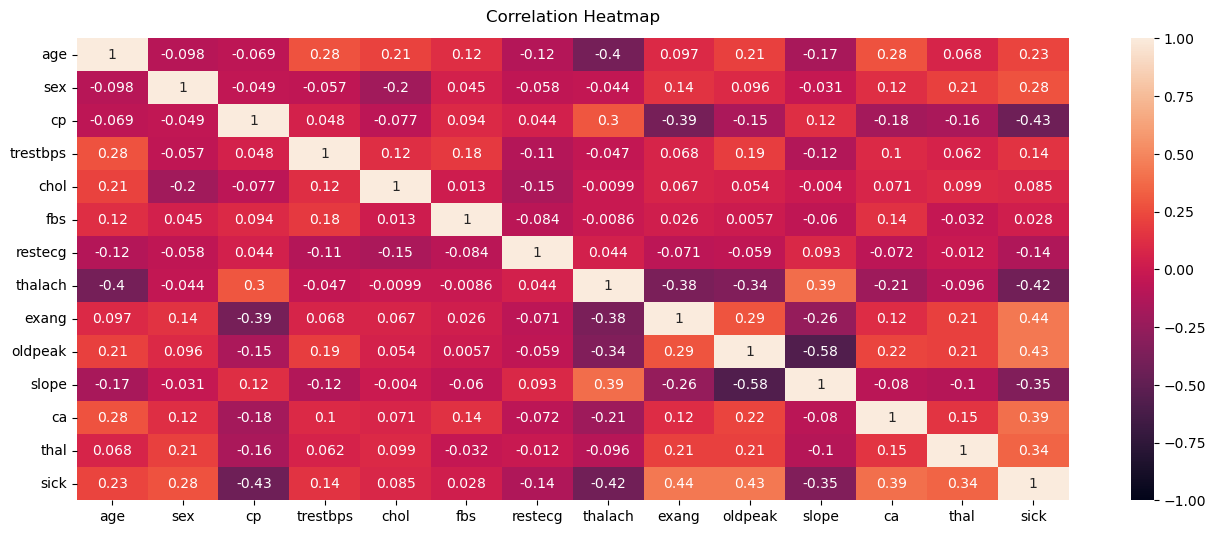

In [15]:
plt.figure(figsize = (16,6))
h_map = sns.heatmap(heart_df.corr(),vmin=-1, vmax=1, annot=True)
h_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

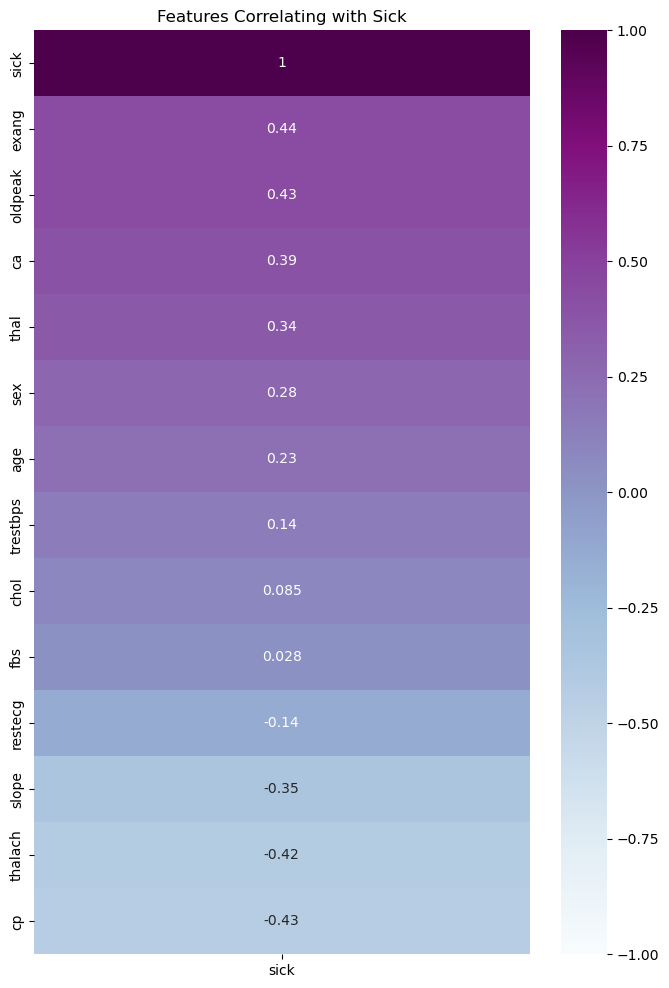

In [16]:
plt.figure(figsize = (8,12))
h_map = sns.heatmap(heart_df.corr()[["sick"]].sort_values(by = "sick",ascending=False),vmin=-1, vmax=1, annot=True,cmap ='BuPu')
h_map.set_title("Features Correlating with Sick")
plt.show()

[Discuss correlations here] 
\
(Exang and sick)Exercise-induced angine is the highest correlated with being sick, since sickness can be easily seen when a person has that chest pain type.

(Age and sick)Age is positively correlated and makes sense since number of old people suffering from heart disease are more than the number of young people.

(ca and sick) ca refers to number of major vessels marked by fluoroscopy procedure. If more vessels are marked, it is highly probable that the person is sick since heart can not receive blood to operate functionally. Therefore, there is positive correlation between ca and sick.

(Sex and sick)Males are more tend to be sick than woman, since they are working at places that require physical work. 

(Thalach and age) It makes sense that the heartbeat rate is higher when a person is young.

(Thalach and slope) Slope of the peak exercise ST segment categorizes the activity of the heart. Decreasing slope refers to blood is pumped into the heart. Increasing slope refers to blood is pumped out of the heart. When a person can not pump blood out of the heart, they allow some blood to flow in while pumping out. Therefore, this yield to a lower heartbeat rate. 
 

## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [17]:
labels = heart_df["sick"]
data = heart_df.drop(["sick"],axis = 1)

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [18]:
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.2, random_state=42)

In [19]:
print("Training sample size: ", train_data.shape[0])
print("Test sample size: ", test_data.shape[0])
print("Ratio of Split: ", train_data.shape[0]/(train_data.shape[0] + test_data.shape[0]))

Training sample size:  242
Test sample size:  61
Ratio of Split:  0.7986798679867987


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [20]:
# k-Nearest Neighbors algorithm
clf = KNeighborsClassifier()
clf.fit(train_data,train_label)

KNeighborsClassifier()

In [21]:
prediction = clf.predict(test_data)

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
accuracy_KNN = metrics.accuracy_score(test_label,prediction)
precision_KNN = metrics.precision_score(test_label,prediction)
recall_KNN = metrics.recall_score(test_label,prediction)
f1_KNN = metrics.f1_score(test_label,prediction)

confusion_matrix = metrics.confusion_matrix(test_label, prediction) 

Accuracy of default KNN with raw data:  0.6885245901639344
Precision of default KNN with raw data:  0.6923076923076923
Recall of default KNN with raw data:  0.6923076923076923
F1 score of default KNN with raw data:  0.6545454545454545


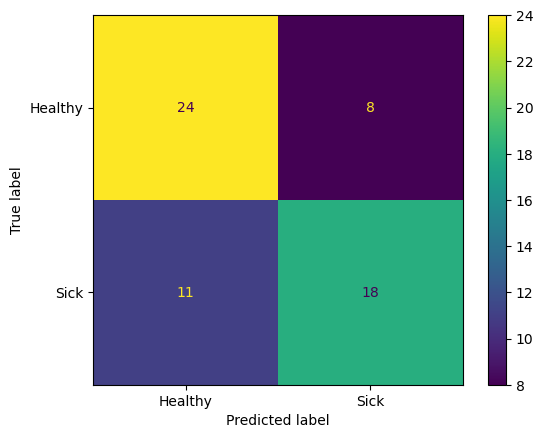

In [23]:
print("Accuracy of default KNN with raw data: ",accuracy_KNN)
print("Precision of default KNN with raw data: ",precision_KNN)
print("Recall of default KNN with raw data: ",precision_KNN)
print("F1 score of default KNN with raw data: ",f1_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ["Healthy","Sick"] )

cm_display.plot()
plt.show() 

### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

### Pipeline:

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
])

numerical_features = ["age", "trestbps","chol","thalach","oldpeak"]
categorical_features = ["sex","cp","fbs","restecg","exang","slope","ca"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", OneHotEncoder(categories = 'auto', handle_unknown = 'ignore'), categorical_features),
])

In [25]:
#Pipeline train data
train_data_tf = full_pipeline.fit_transform(train_data)

In [26]:
#Pipeline test data
test_data_tf = full_pipeline.transform(test_data)

### Now retrain your model and compare the accuracy metrics with the raw and pipelined data. 

KNeighborsClassifier()
Accuracy with transformed data:  0.8360655737704918
Precision with transformed data:  0.8064516129032258
Recall with transformed data:  0.8620689655172413
F1 score with transformed data:  0.8333333333333334


C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


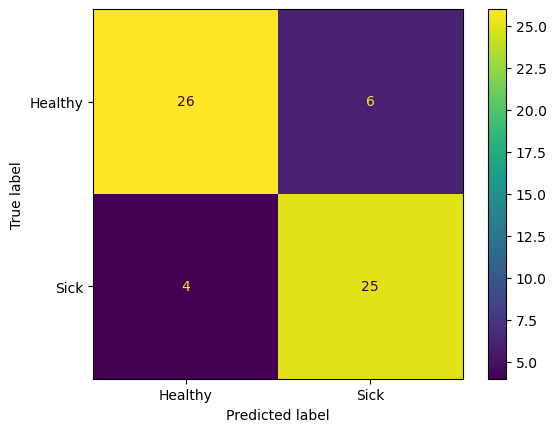

In [27]:
# k-Nearest Neighbors algorithm
clf = KNeighborsClassifier()
report_classifier_performance(clf,train_data_tf, test_data_tf,train_label,test_label)

[Discuss Results here] Classifier is definitely working better with transformed data since all metrics are higher. Accuracy with raw data was 0.68 and accuracy with transformed data was 0.83. Therefore, it is obvious that using a StandardScaler and OneHotEncoding transformation for this dataset is necessary. KNN algorithm is prone to distances since it uses euclidean distance. Normalizing values solves the problem of high magnitudes arises when calculating the distance.

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

KNN with k =  1
KNeighborsClassifier(n_neighbors=1)
Accuracy with transformed data:  0.8032786885245902
Precision with transformed data:  0.7741935483870968
Recall with transformed data:  0.8275862068965517
F1 score with transformed data:  0.7999999999999999


C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


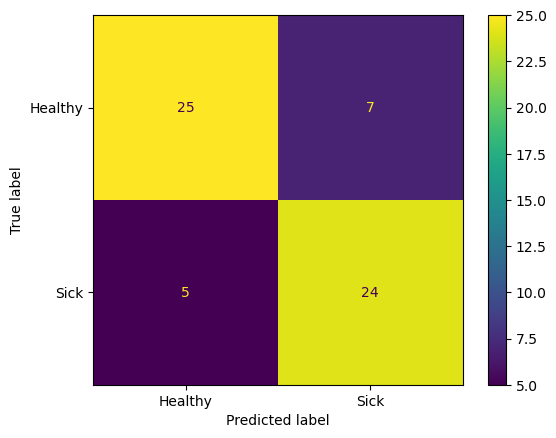

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN with k =  2
KNeighborsClassifier(n_neighbors=2)
Accuracy with transformed data:  0.8360655737704918
Precision with transformed data:  0.9130434782608695
Recall with transformed data:  0.7241379310344828
F1 score with transformed data:  0.8076923076923076


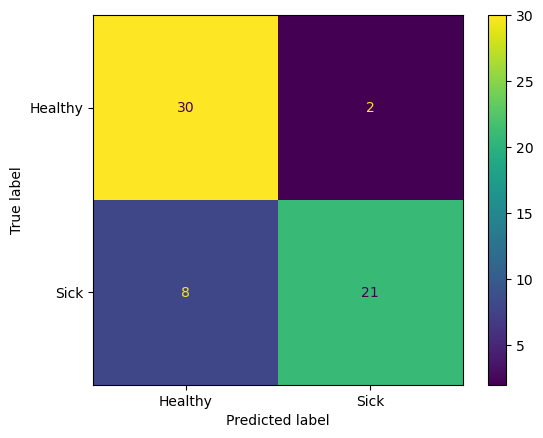

KNN with k =  3
KNeighborsClassifier(n_neighbors=3)
Accuracy with transformed data:  0.8852459016393442
Precision with transformed data:  0.8928571428571429
Recall with transformed data:  0.8620689655172413
F1 score with transformed data:  0.8771929824561403


C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


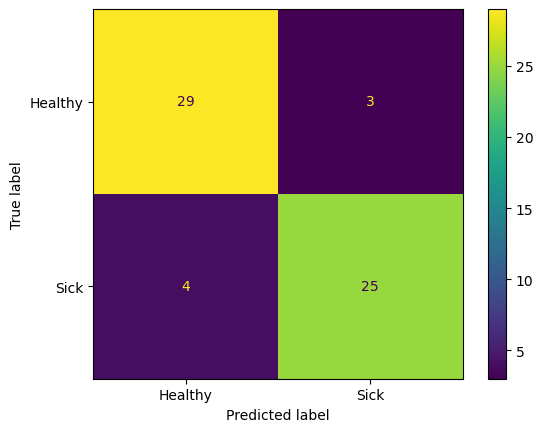

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN with k =  5
KNeighborsClassifier()
Accuracy with transformed data:  0.8360655737704918
Precision with transformed data:  0.8064516129032258
Recall with transformed data:  0.8620689655172413
F1 score with transformed data:  0.8333333333333334


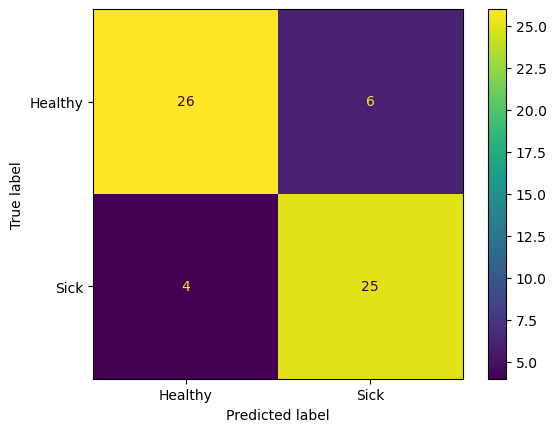

KNN with k =  7
KNeighborsClassifier(n_neighbors=7)
Accuracy with transformed data:  0.8688524590163934
Precision with transformed data:  0.8620689655172413
Recall with transformed data:  0.8620689655172413
F1 score with transformed data:  0.8620689655172413


C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


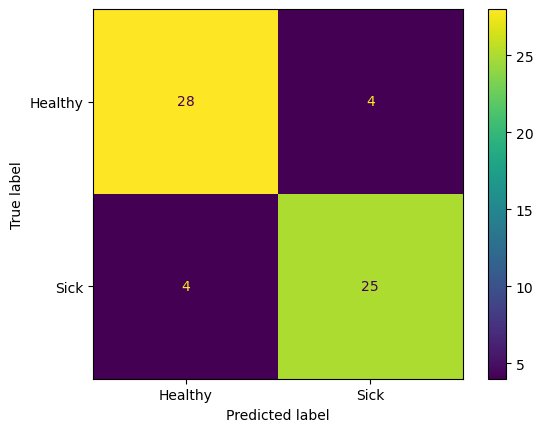

KNN with k =  9
KNeighborsClassifier(n_neighbors=9)
Accuracy with transformed data:  0.8688524590163934
Precision with transformed data:  0.8620689655172413
Recall with transformed data:  0.8620689655172413
F1 score with transformed data:  0.8620689655172413


C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


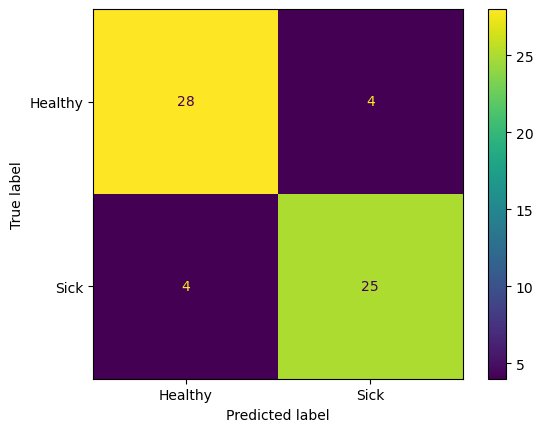

KNN with k =  10
KNeighborsClassifier(n_neighbors=10)
Accuracy with transformed data:  0.8688524590163934
Precision with transformed data:  0.8888888888888888
Recall with transformed data:  0.8275862068965517
F1 score with transformed data:  0.8571428571428572


C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


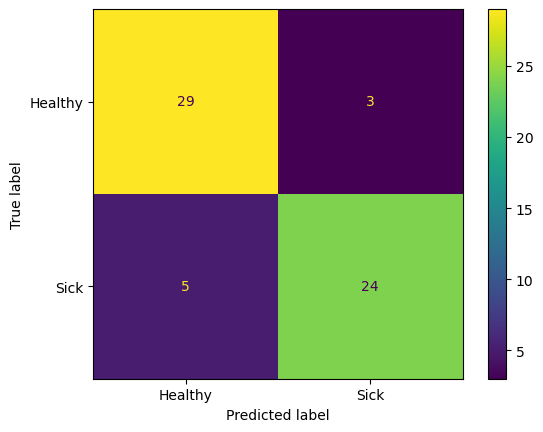

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN with k =  20
KNeighborsClassifier(n_neighbors=20)
Accuracy with transformed data:  0.8524590163934426
Precision with transformed data:  0.8571428571428571
Recall with transformed data:  0.8275862068965517
F1 score with transformed data:  0.8421052631578947


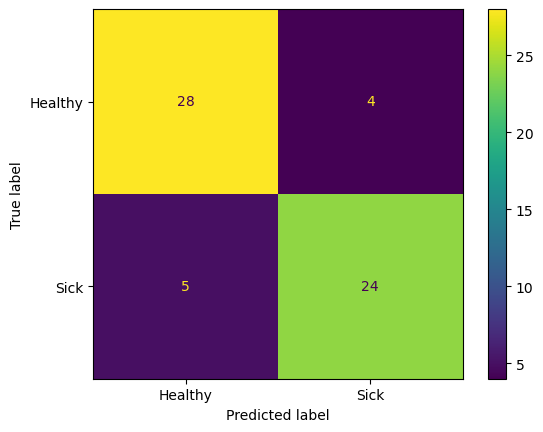

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN with k =  50
KNeighborsClassifier(n_neighbors=50)
Accuracy with transformed data:  0.8360655737704918
Precision with transformed data:  0.8518518518518519
Recall with transformed data:  0.7931034482758621
F1 score with transformed data:  0.8214285714285715


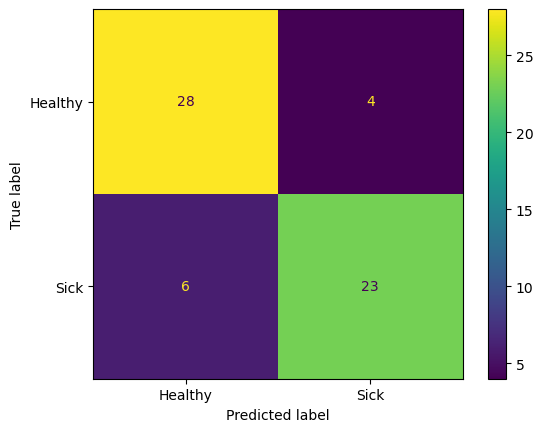

In [28]:
accuracy_list = []
k_list = [1,2,3,5,7,9,10,20,50]
for i in range(0,len(k_list)):
    # k-Nearest Neighbors algorithm
    print("KNN with k = ", k_list[i])
    clf = KNeighborsClassifier(n_neighbors = k_list[i])
    report_classifier_performance(clf,train_data_tf, test_data_tf,train_label,test_label)
    

## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

### This time in addition to accuracy report metrics for: 
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



LogisticRegression(random_state=42)
Accuracy with transformed data:  0.8688524590163934
Precision with transformed data:  0.8387096774193549
Recall with transformed data:  0.896551724137931
F1 score with transformed data:  0.8666666666666666


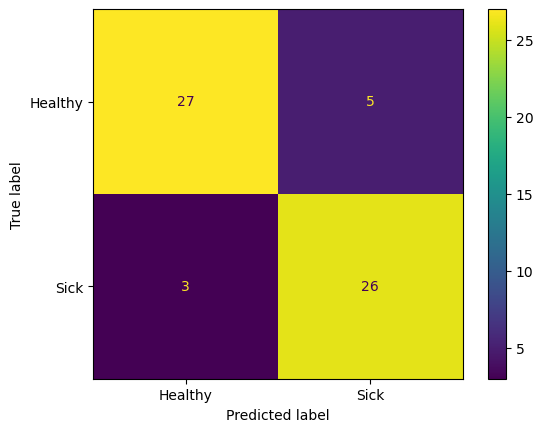

In [29]:
# Logistic Regression
clf = LogisticRegression(random_state = 42)
report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label)


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[Provide explanation for each measure here] 
\
Accuracy: In mathematical terms, accuracy is defined as (TP + TN)/(TP + FP + TN + FN) which calculates the percentage of correct labelling over all labelling. Therefore, getting a high accuracy means that classifier is able to correctly classify each label. Algorithms that report accuracy of 0.99 generally called as state-of-art algorithms which most people in the field tries to achieve. In our case, accuracy reports the correctly classified all samples. Having a high accuracy is desired since it will help doctors to easily classify a person as sick or healthy. Note that, there is no weight associated with labeling as positive or negative.\
\
Precision: Precision is related with positive labelling. In mathematical terms, precision is defined as (TP /(TP + FP). It calculates the percentage of correctly labelled actual positives over all labelled positives. In our case, it calculates the performance of labelling a person as sick. It is important to distinguish whether sick labelled person is sick or healthy. If the person is healthy, the unnecessary treatment may harm the person. Therefore, precision and recall scores should be investigated with the context of the study. In the study of COVID classification, this score is not much important since false positives will only need to stay at home. However, the unnecessary treatment is also applicable in that context.\
\
Recall: In mathematical terms, recall is defined as (TP/ (TP + FN).
It calculates the percentage of correctly labelled actual positives over all actual positives. In our context, recall is significantly important since an actual sick person might be labelled as healthy person in case of low recall score. This may yield to the death or injury of that person since treatment was not given to that sick person. For COVID classification, this score is highly important, since if an actual positive person is labelled as false negative. That person can go out and spread the virus which dangers the people around that person.\
\
F1 Score: In mathematical terms, F1 score is defined as ( 2* Precision * Recall / (Precision + Recall)). Therefore, F1 score is the harmonic mean of Precision and Recall. F1 Score can be chosen over accuracy since it also includes the balance of the correct labelling, whereas accuracy does not include the balance of correct labelling. Although this imbalance is not seen at our results. Suppose there is an imbalance at labelling. The accuracy can be reported as above. Let's say TP = 10, TN = 80, FN = 5, FP = 5. Then accuracy will be 90% which is near to what we found. Recall and precision will be 66% which is very low. F1 score will be 66 indicating that classifier is performing bad. Therefore, when TN and TP are not equal in number, one should check F1 Score and False Positive Rate to distinguish the performance of classifier. In our case, let's assume that there is a imbalance between the numbers of TN and TP. We can label an actual sick person as sick in rate of 0.66 which is low.

Confusion matrix reports the TN,FN,FP,TP in a matrix format.\
\
TN is the count of [prediction == 0 && actual == 0] at matrix[0,0].
\
FN is the count of [prediction == 0 && actual == 1] at matrix[0,1].
\
FP is the count of [prediction == 1 && actual == 0] at matrix[1,0].
\
TP is the count of [prediction == 1 && actual == 1] at matrix[1,1].
\
This is not in the case of multi-class classification.

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

LogisticRegression(max_iter=10, penalty='none', random_state=42, solver='sag')
Accuracy with transformed data:  0.8688524590163934
Precision with transformed data:  0.8387096774193549
Recall with transformed data:  0.896551724137931
F1 score with transformed data:  0.8666666666666666


C:\Users\yaman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


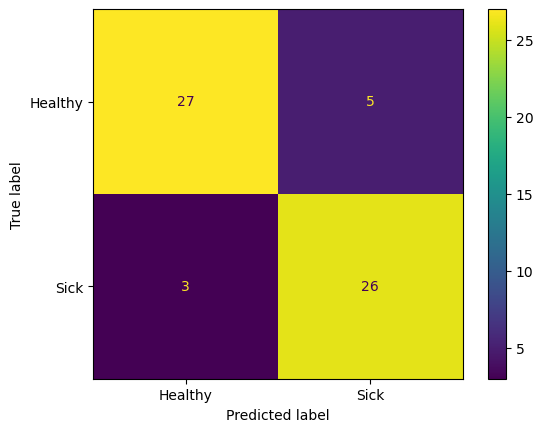

In [30]:
# Logistic Regression
clf = LogisticRegression(random_state = 42, solver = 'sag', max_iter = 10, penalty = 'none')
report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label)


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

LogisticRegression(max_iter=1600, penalty='none', random_state=42, solver='sag')
Accuracy with transformed data:  0.819672131147541
Precision with transformed data:  0.78125
Recall with transformed data:  0.8620689655172413
F1 score with transformed data:  0.8196721311475409


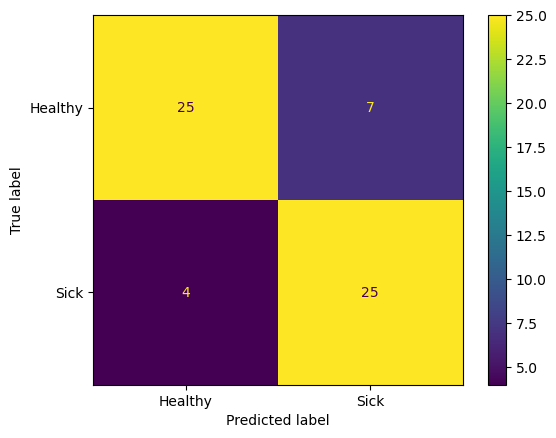

In [31]:
# Logistic Regression
clf = LogisticRegression(random_state = 42, solver = 'sag', max_iter = 1600, penalty = 'none')
report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label)


###### Explain what you changed, and why do you think that may have altered the outcome. 


[Provide explanation here] Changed max_iter to 1600 which made algorithm to converge. However, data is now overfitted to the training data, which resulted lower test metrics. Accuracy dropped from 0.87 to 0.82.The error between train_label and predict(train_data) gets closer to 0 if the algorithm converges. By setting max_iter = 1600, I have let algorithm to get closer to 0 error more. However, many algorithms are stopped early to avoid overfitting. Overfitting leads to less generalizations and higher test error. tol parameter can be also changed to force algorithm to stop early.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
Accuracy with transformed data:  0.8688524590163934
Precision with transformed data:  0.8387096774193549
Recall with transformed data:  0.896551724137931
F1 score with transformed data:  0.8666666666666666


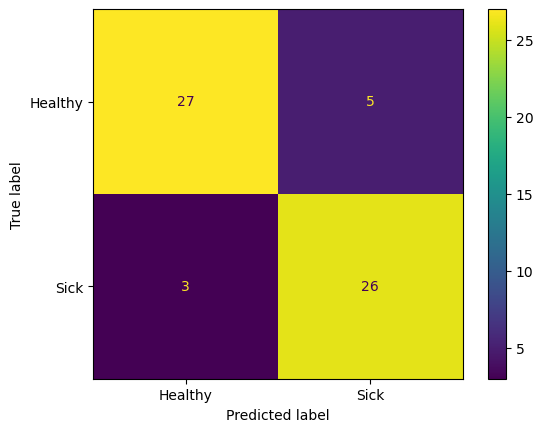

In [32]:
# Logistic Regression
clf = LogisticRegression(random_state = 42, solver = 'liblinear', penalty = 'l1')
report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label)


### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!). 

Metrics did not change in my case, however we were able to converge to same train error in without convergence problem. If I compare with max_iter = 1600, metrics were better with liblinear.\
Liblinear: The problem of liblinear are that it can get stuck at a non-optima point if the level curves of a function are not smooth, however it is able to solve large-scale problems that involve high dimension datasets.\
Sag: Sag achieves a faster convergence rate than other stochastic gradient methods. It is also faster than others solvers when dataset is large in both samples and features. However, SAGA has a better convergence compared to Sag.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [33]:
# SVM
clf = SVC(probability=True)

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using the `from sklearn.metrics import plot_confusion_matrix` library for this one!


SVC(probability=True)
Accuracy with transformed data:  0.8852459016393442
Precision with transformed data:  0.8666666666666667
Recall with transformed data:  0.896551724137931
F1 score with transformed data:  0.8813559322033899


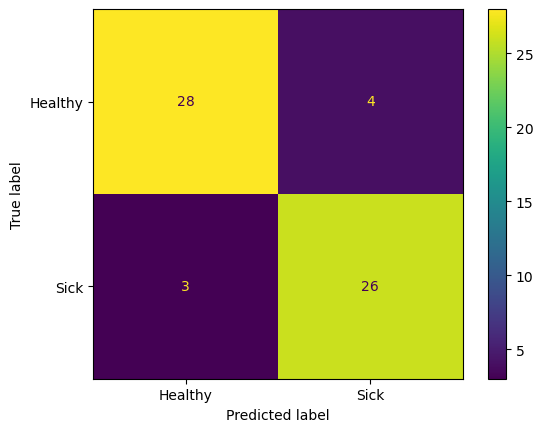

In [34]:
report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label)

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


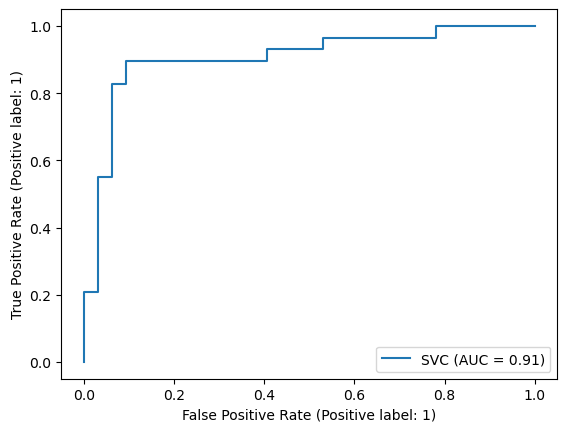

In [35]:
metrics.plot_roc_curve(clf,test_data_tf ,test_label)
plt.show()

[Describe what an ROC Curve is and what the results mean here] The ROC curve is related with relationship between true positive rate and the false positive rate in the context of different threshold values. AUC which area under the curve is an important metric that shows the usefulness of the test procedure. If the number is high, AUC indicates that the model is performing well. If the number is low, model is performing poor. True positive rate is also called sensitivity which is defined as TP/(TP+FN). This ratio indicates the probability that an actual positive will test positive. False positive rate which is also called false alarm ratio is defined as FP/FP+TN. This rate can be also interpreted as the percentage of the sickly labeled healthy person over all healthy people. We want this ratio to be small since healthy people should be labeled as healthy. 

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [36]:
# SVM
clf = SVC(kernel = 'linear',probability=True)

SVC(kernel='linear', probability=True)
Accuracy with transformed data:  0.8360655737704918
Precision with transformed data:  0.7878787878787878
Recall with transformed data:  0.896551724137931
F1 score with transformed data:  0.8387096774193549


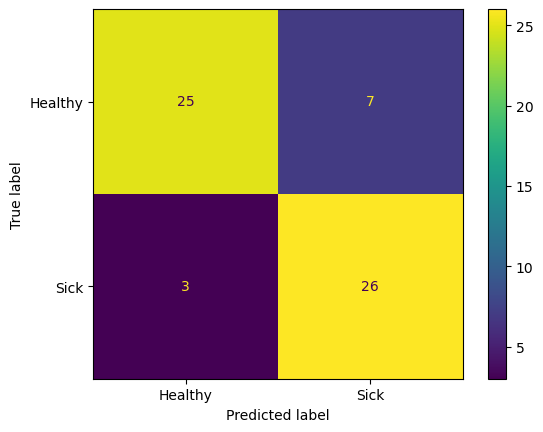

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


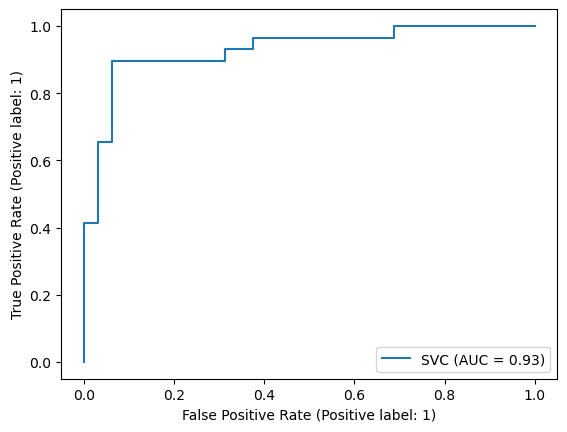

In [37]:
report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label)
metrics.plot_roc_curve(clf,test_data_tf ,test_label)
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[Provide Answer here:] When we change kernel from default to linear, we are actually changing the kernel from rbf(Radial Basis Function) to linear. RBF is used for datasets that include nonlinearity and linearly unseperable labels. The boundaries with rbf are non-linear and they can be only determined by kernel functions. Kernel functions represent feature vectors in higher dimension.\
These are the results of SVM with RBF:\
Accuracy with transformed data:  0.8852459016393442\
Precision with transformed data:  0.8666666666666667\
Recall with transformed data:  0.896551724137931\
F1 score with transformed data:  0.8813559322033899\
AUC = 91\
These are the results of SVM with Linear kernel:\
Accuracy with transformed data:  0.8360655737704918\
Precision with transformed data:  0.7878787878787878\
Recall with transformed data:  0.896551724137931\
F1 score with transformed data:  0.8387096774193549\
AUC = 93\
Note that all metrics are performing better in the case of RBF, since our boundaries are drawn nonlinearly. Nonlinear boundaries are able to grasp nonlinear relationships between features.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Provide Answer here:] SVM tries to achieve a high margin between classified points. However, logistic regression uses the sigmoid function to converge to a solution. They both use w.Tx + b linear function to calculate the error, therefore they are both considered as linear decision boundary finders. Cost function of logistic regression includes log, whereas SVM uses hinge loss which includes max. Also note that, outliers does not have an effect on loss function of SVM where as outliers in logistic regression has signifant effect on convergence to an optimal solution. In addition to SVM, inaccurately labeled points incurs large loss where as correctly labeled points that are inside the margin incurs small loss. Other points does not incur loss. Lastly, you can not get zero loss even if the data is linearly seperable while doing logistic regression.